# Aerofit

## Treadmills recommendation to new customers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

### EDA

In [6]:
aerofit_df = pd.read_csv('aerofit_treadmill_data.csv')
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
aerofit_df.shape

(180, 9)

In [8]:
aerofit_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
aerofit_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [10]:
aerofit_df['Product'] = aerofit_df['Product'].astype('category')
aerofit_df['Gender'] = aerofit_df['Gender'].astype('category')
aerofit_df['MaritalStatus'] = aerofit_df['MaritalStatus'].astype('category')
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


### Statistical Summary

In [13]:
aerofit_df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Standard deviation for Income & Miles is very high.** <br>
**These variables might have outliers in them.**  <br>
**Minimum & Maximum age of the person is 18 & 50, mean is 28.79, and 75% of persons have an age less than or equal to 33.**  <br>
**Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.**
**Out of 180 data points, 104's gender is Male and rest are the Female.**

In [14]:
aerofit_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [15]:
aerofit_df.duplicated(subset=None,keep='first').sum()

0

In [16]:
aerofit_df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [17]:
aerofit_df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [18]:
aerofit_df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [19]:
aerofit_df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [20]:
for column in aerofit_df.columns:
    unique_values = aerofit_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Product':
['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']


Unique values in column 'Age':
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


Unique values in column 'Gender':
['Male', 'Female']
Categories (2, object): ['Female', 'Male']


Unique values in column 'Education':
[14 15 12 13 16 18 20 21]


Unique values in column 'MaritalStatus':
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']


Unique values in column 'Usage':
[3 2 4 5 6 7]


Unique values in column 'Fitness':
[4 3 2 1 5]


Unique values in column 'Income':
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701 

### Univariate Analysis

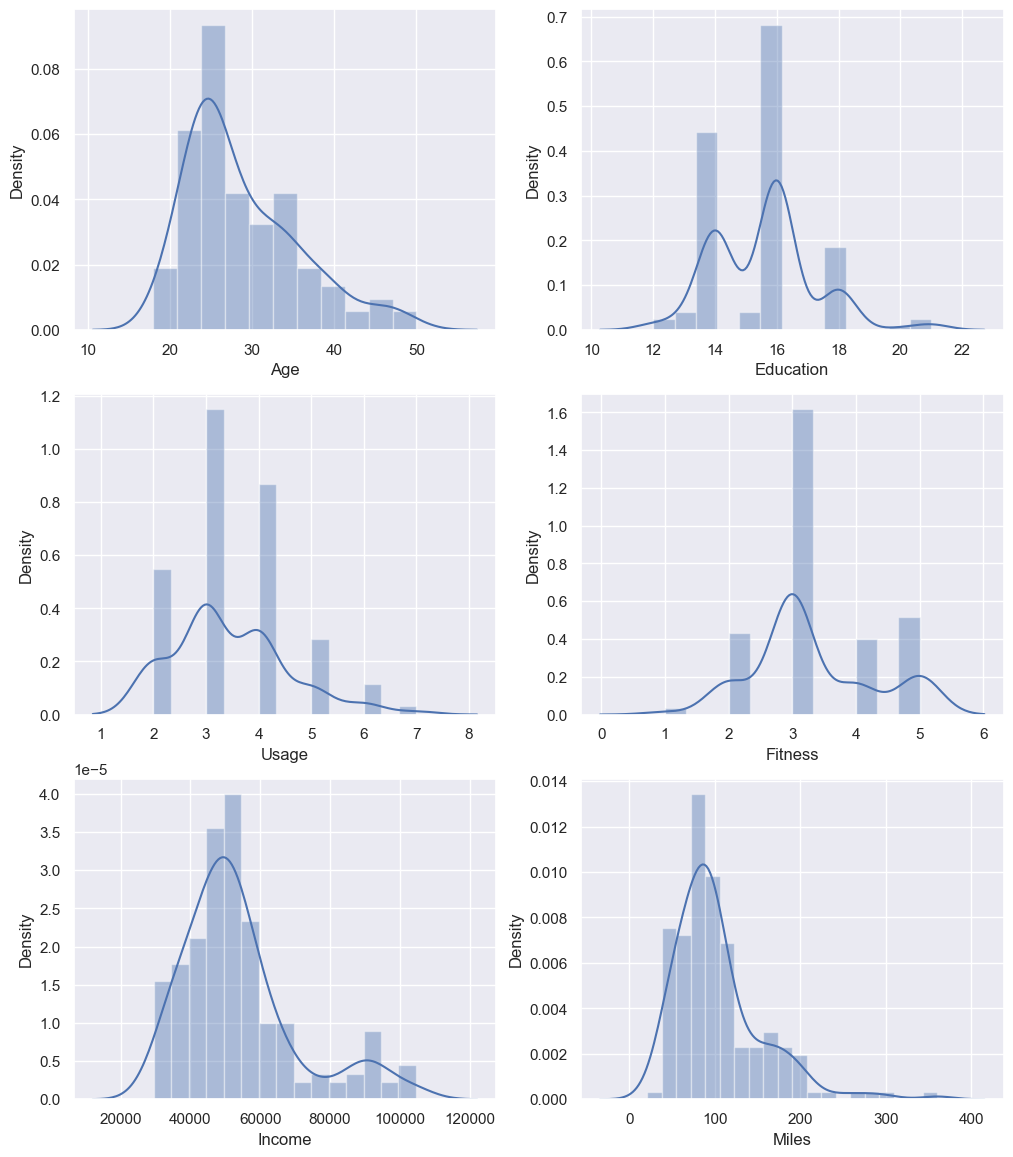

In [21]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.distplot(aerofit_df['Age'], kde=True, ax=axis[0,0])
sns.distplot(aerofit_df['Education'], kde=True, ax=axis[0,1])
sns.distplot(aerofit_df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(aerofit_df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(aerofit_df['Income'], kde=True, ax=axis[2,0])
sns.distplot(aerofit_df['Miles'], kde=True, ax=axis[2,1])
plt.show()

### Observations:

**Both Miles and Income have significant outliers based on the above distribution.** <br>

**Also Miles and Income are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.** <br>

**Customer with fitness level 3 buy a major chuck of treadmills.** <br>

**Majority of Customers fall within the 45,000 - 60,000 income range.** <br>

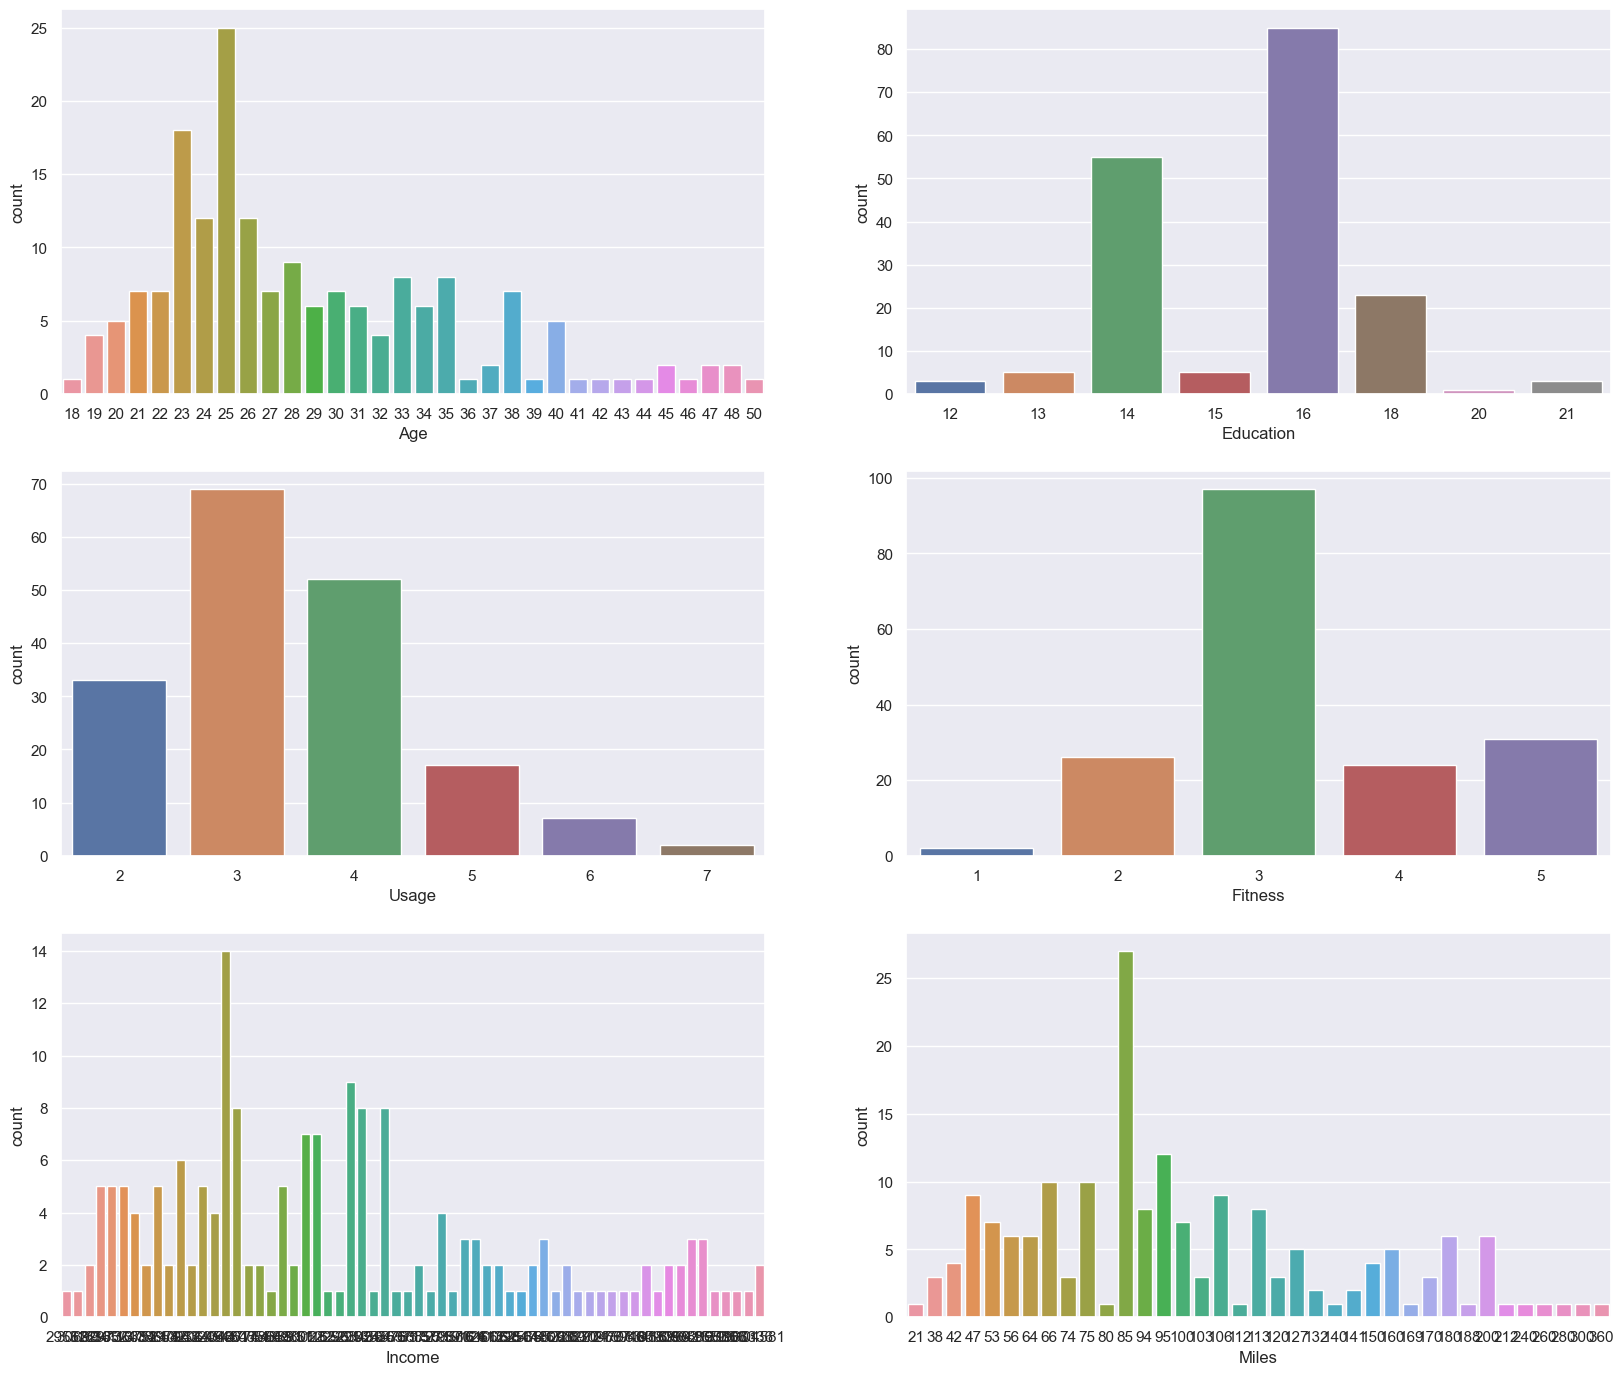

In [22]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=aerofit_df, x="Age", ax=axis[0,0])
sns.countplot(data=aerofit_df, x="Education", ax=axis[0,1])
sns.countplot(data=aerofit_df, x="Usage", ax=axis[1,0])
sns.countplot(data=aerofit_df, x="Fitness", ax=axis[1,1])
sns.countplot(data=aerofit_df, x="Income", ax=axis[2,0])
sns.countplot(data=aerofit_df, x="Miles", ax=axis[2,1])
plt.show()

**Young people at age of 25 are more conscious about health and are using treadmills more than old aged people.** 

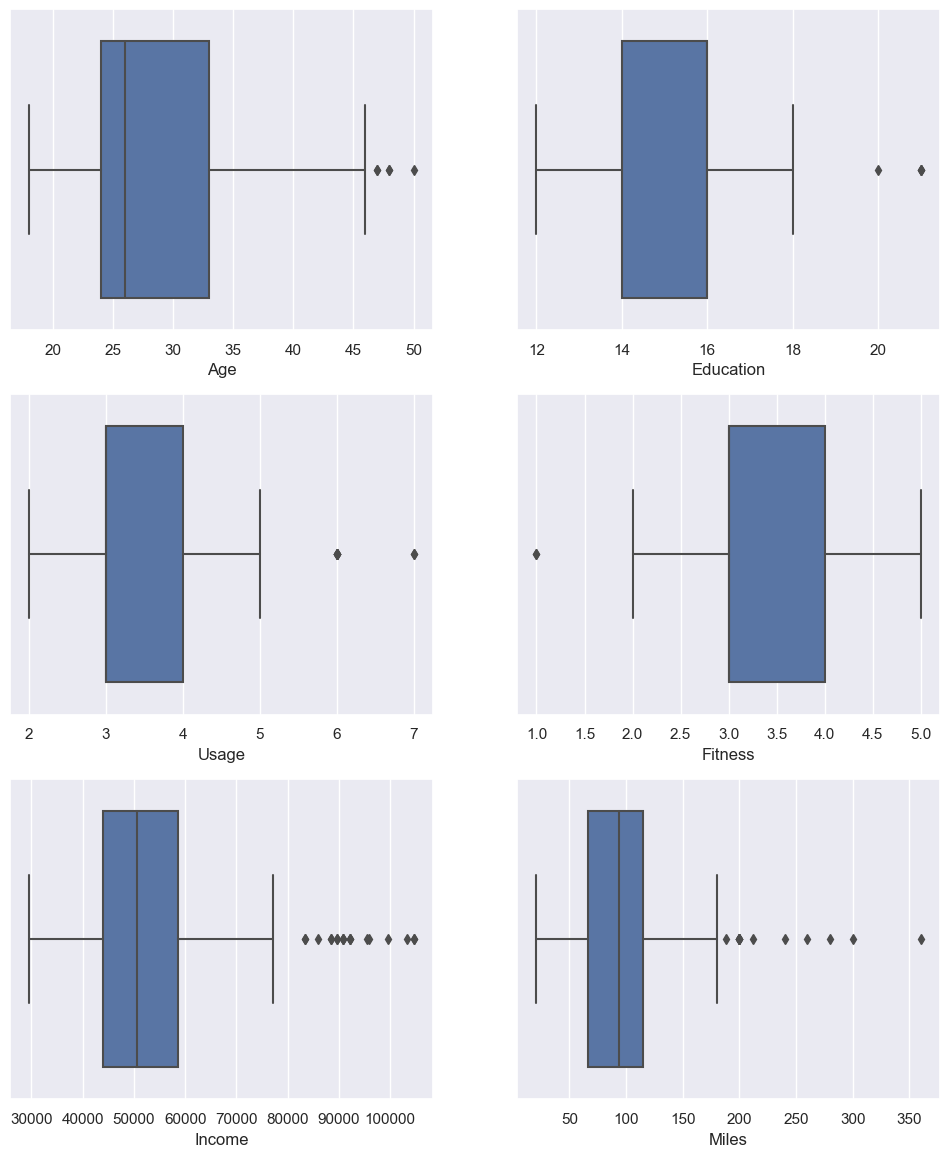

In [23]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit_df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=aerofit_df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

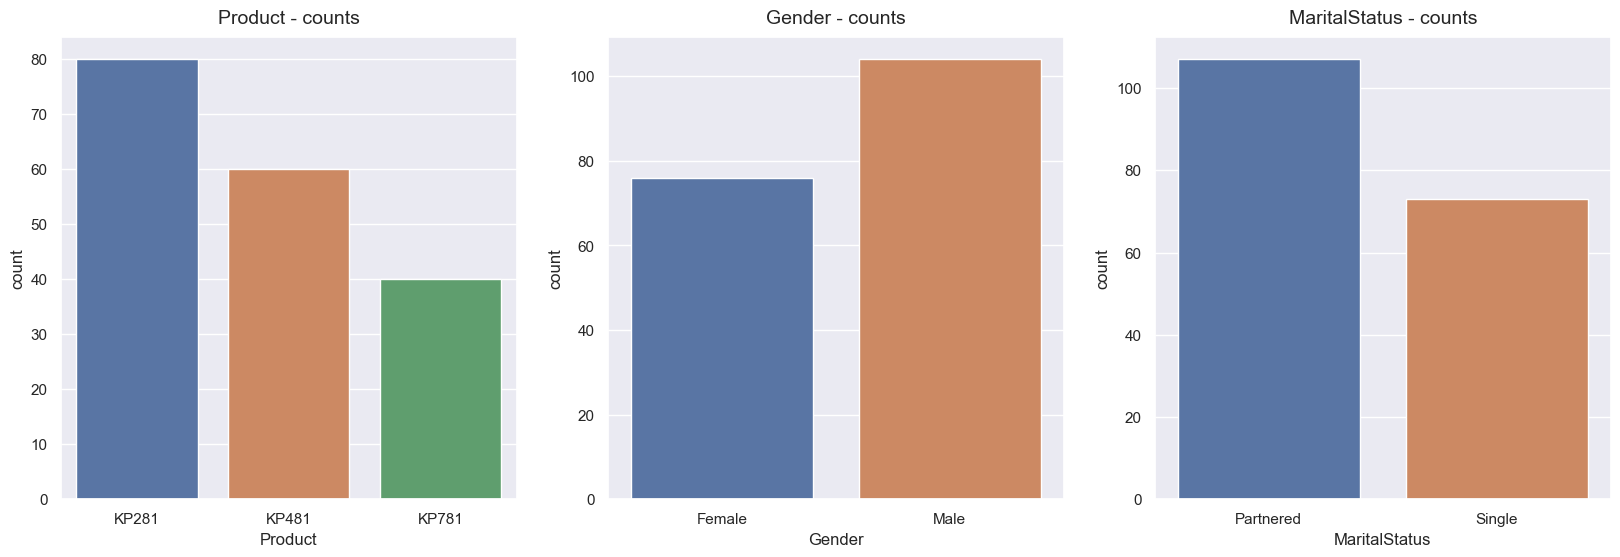

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=aerofit_df, x='Product', ax=axs[0])
sns.countplot(data=aerofit_df, x='Gender', ax=axs[1])
sns.countplot(data=aerofit_df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

### Bivariate Analysis

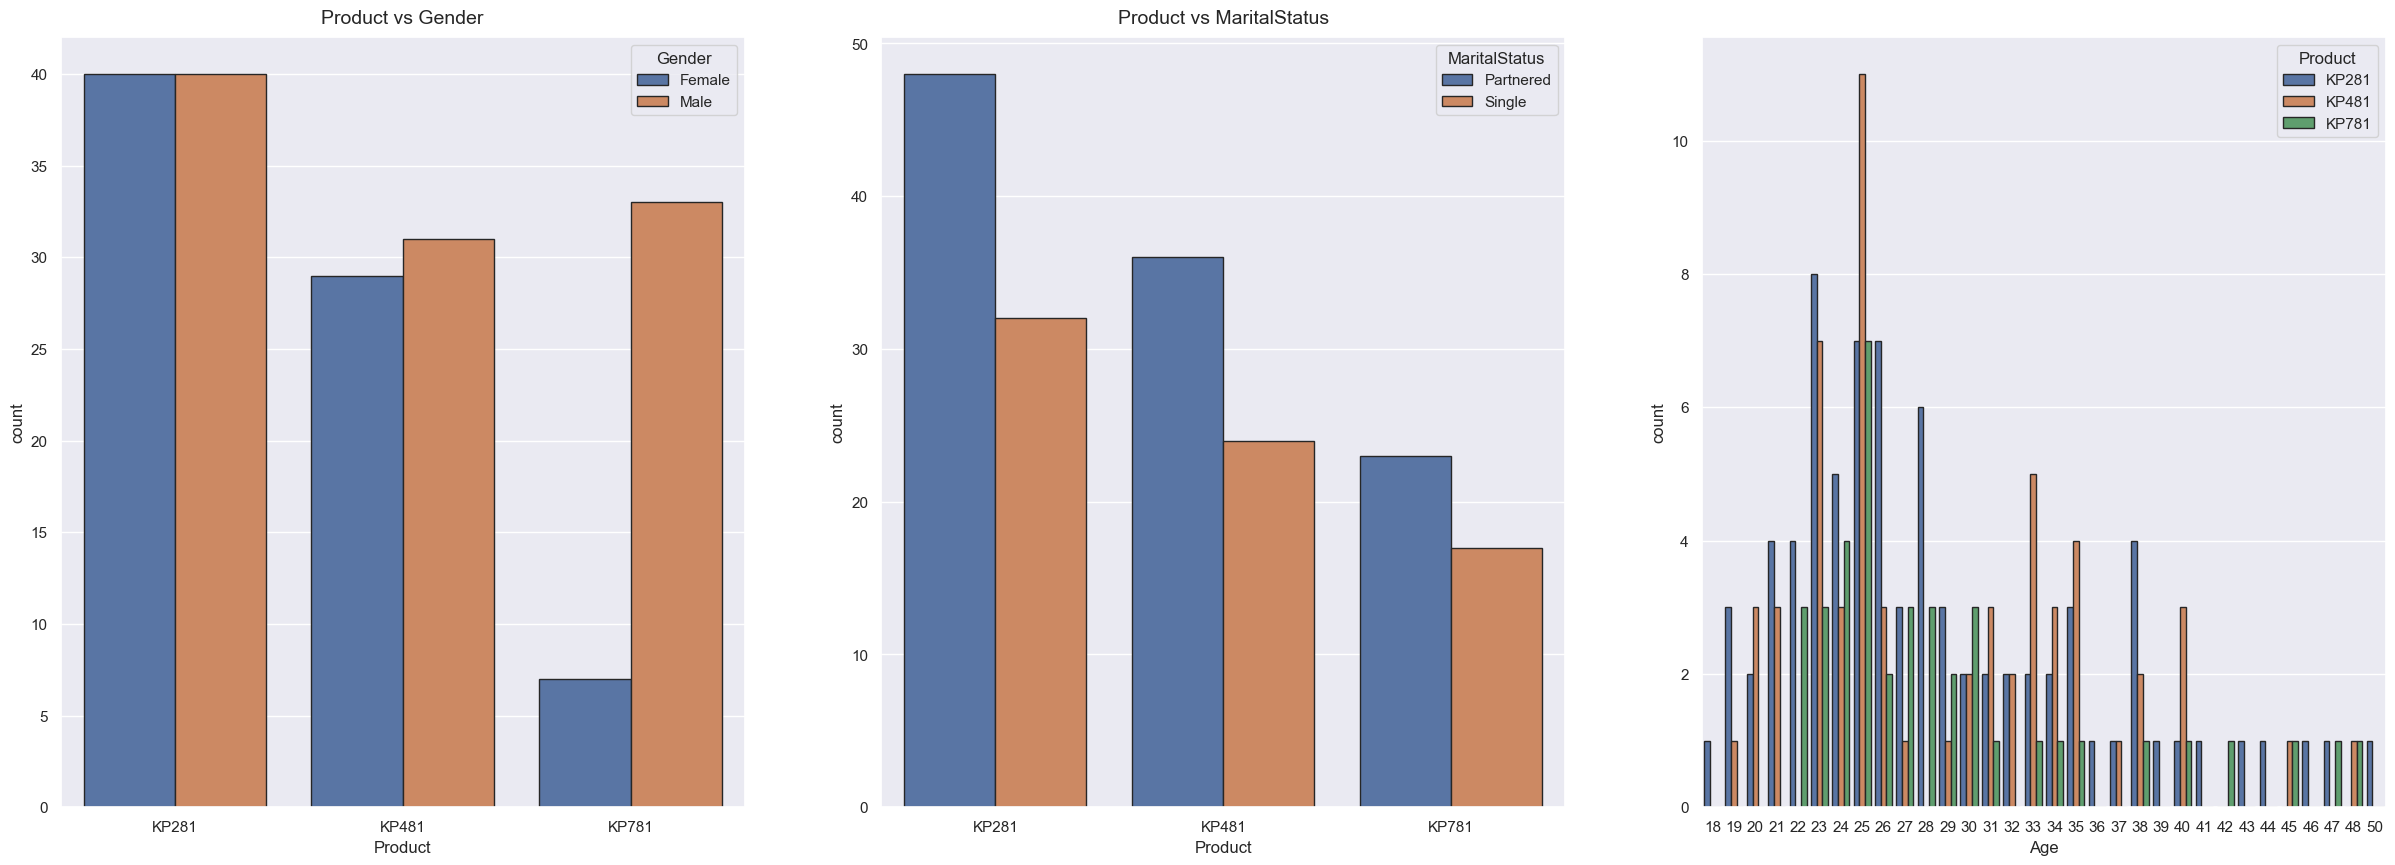

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=aerofit_df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=aerofit_df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=aerofit_df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

#### Obervations

**Product vs Gender**<br>
1. Equal number of males and females have purchased KP281 product and Almost same for the product KP481<br>
2. Most of the Male customers have purchased the KP781 product.<br>
**Product vs MaritalStatus**<br>
1. Customer who is Partnered, is more likely to purchase the product.<br>
**Age vs Product**<br>
1. Customers with age of 25 are more likely to purchase the KP481 product.

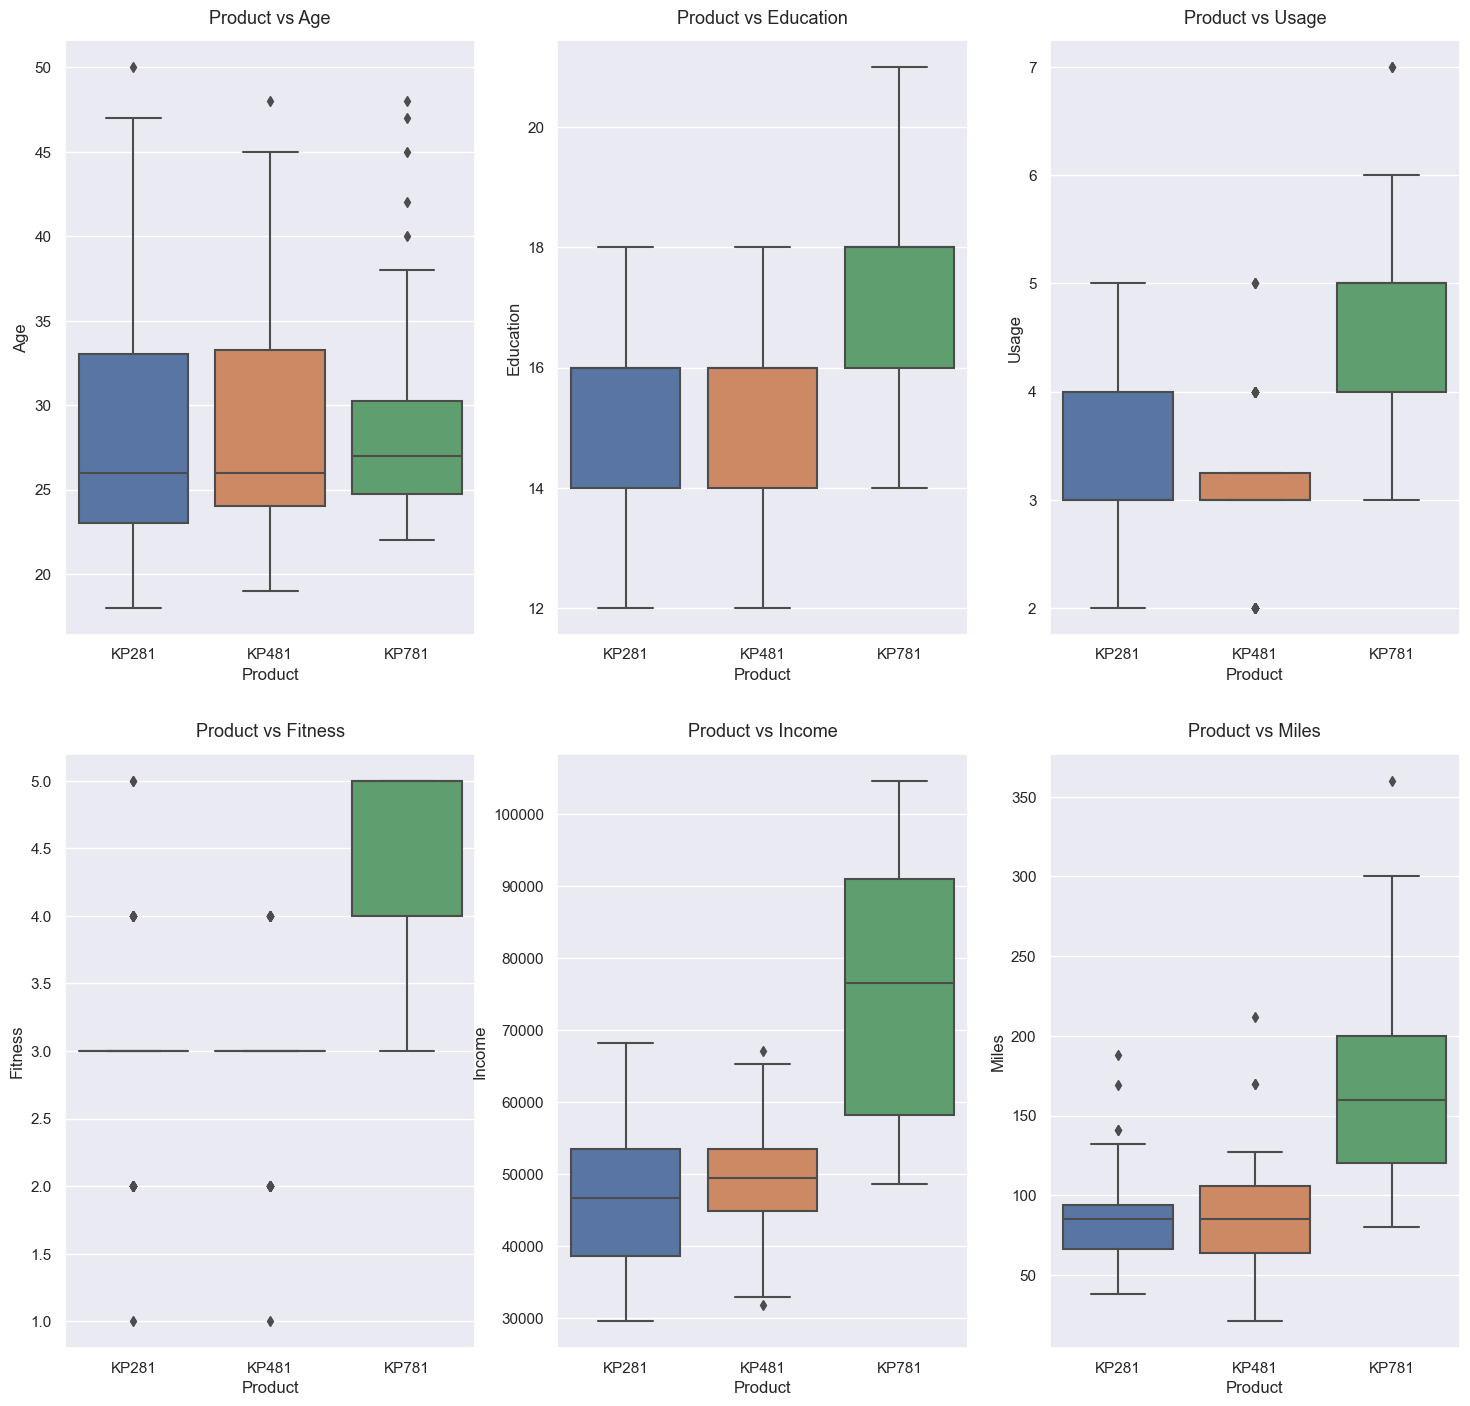

In [26]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=aerofit_df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

### Observations:

#### Product vs Age:
- The **median age** of customers purchasing products **KP281** and **KP481** is the same.
- Customers between the ages of **25-30** are more likely to buy the **KP781** product.

#### Product vs Education:
- Customers with an **education level greater than 16 years** are more likely to purchase the **KP781** product.
- Customers with an **education level less than 16 years** have equal chances of purchasing either **KP281** or **KP481**.

#### Product vs Usage:
- Customers who plan to use the treadmill **more than 4 times a week** are more inclined to purchase the **KP781** product.
- Customers using the treadmill **less than 4 times a week** are more likely to purchase **KP281** or **KP481**.

#### Product vs Fitness:
- The higher the customer's **fitness level (>= 3)**, the greater the likelihood of them purchasing the **KP781** product.

#### Product vs Income:
- Customers with an **income of ₹60,000 or more** are more likely to purchase the **KP781** product.

#### Product vs Miles:
- If a customer plans to **walk or run more than 120 miles per week**, they are more likely to buy the **KP781** product.

### Multivariate Analysis

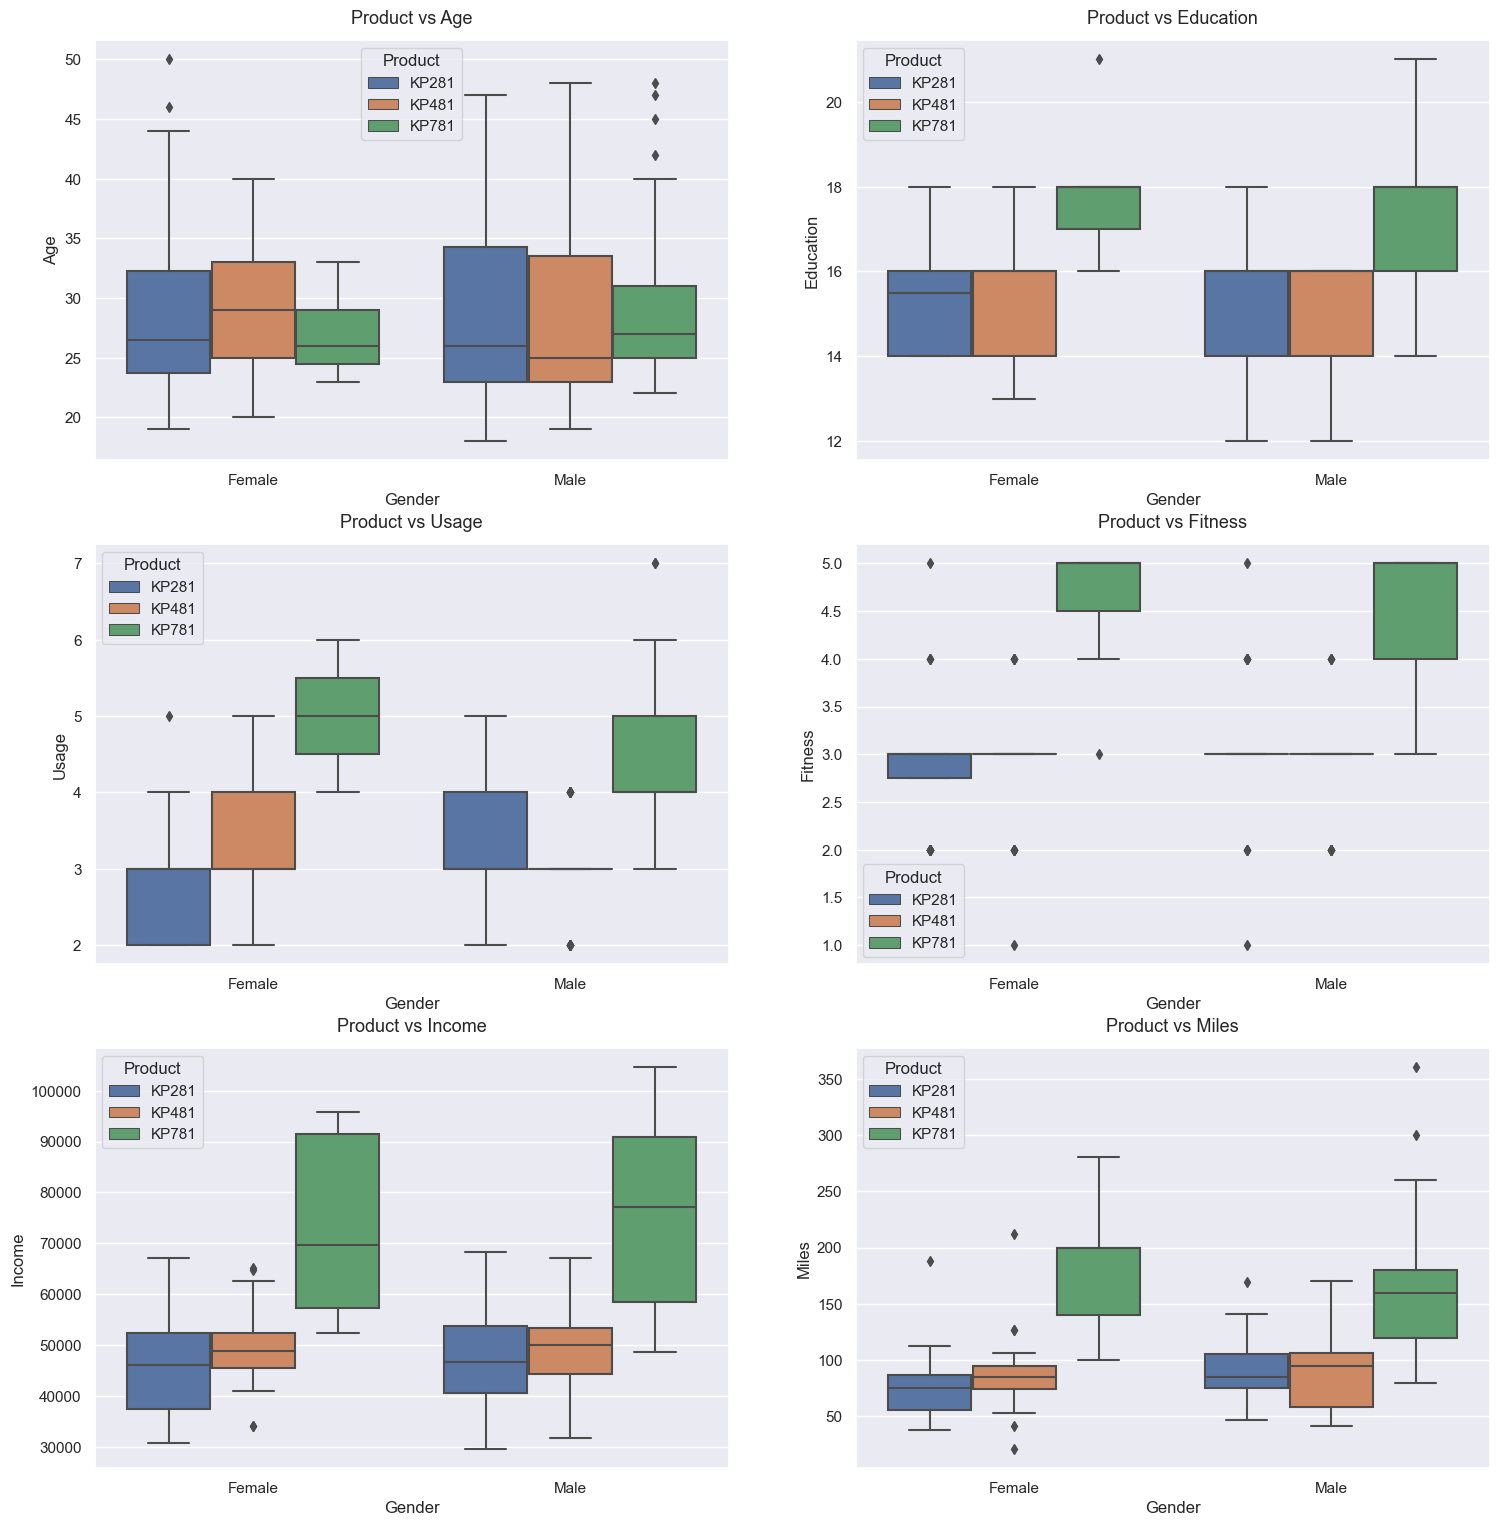

In [27]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit_df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

#### Females planning to use the treadmill 3-4 times a week, are more likely to buy the KP481 product

### Correlation Analysis

In [34]:
# Select numeric columns only
numeric_df = aerofit_df.select_dtypes(include=['float64', 'int64'])

# Perform an operation (e.g., converting to float)
numeric_df = numeric_df.apply(lambda x: x.astype(float))

# Now df has the numeric columns processed and non-numeric columns retained
numeric_df.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [35]:
numeric_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


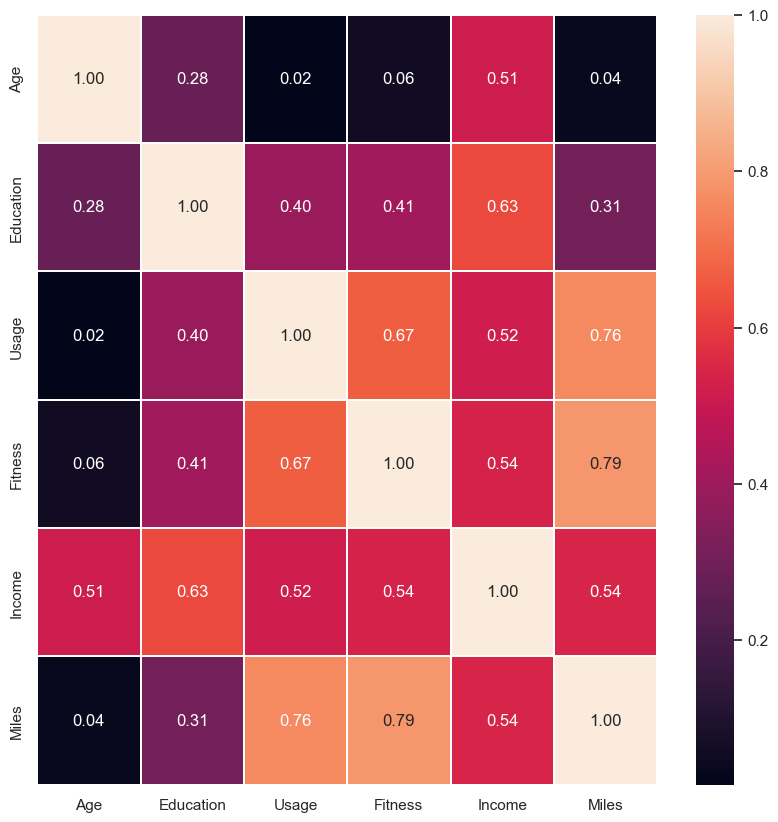

In [36]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.heatmap(numeric_df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()

### Observations:

- There is a **strong correlation** between the **Miles & Fitness** and **Miles & Usage** attributes, indicating that customers with a higher fitness level tend to use treadmills more frequently.
  
- A **strong correlation** is observed between **Income and Education**, showing that customers with higher incomes and higher education levels prefer the **KP781 treadmill**, which offers more advanced features.

- There is **no significant correlation** between **Usage & Age** or **Fitness & Age**, implying that **age** is not a barrier when it comes to treadmill usage or preference for specific treadmill models.

### Pair Plots

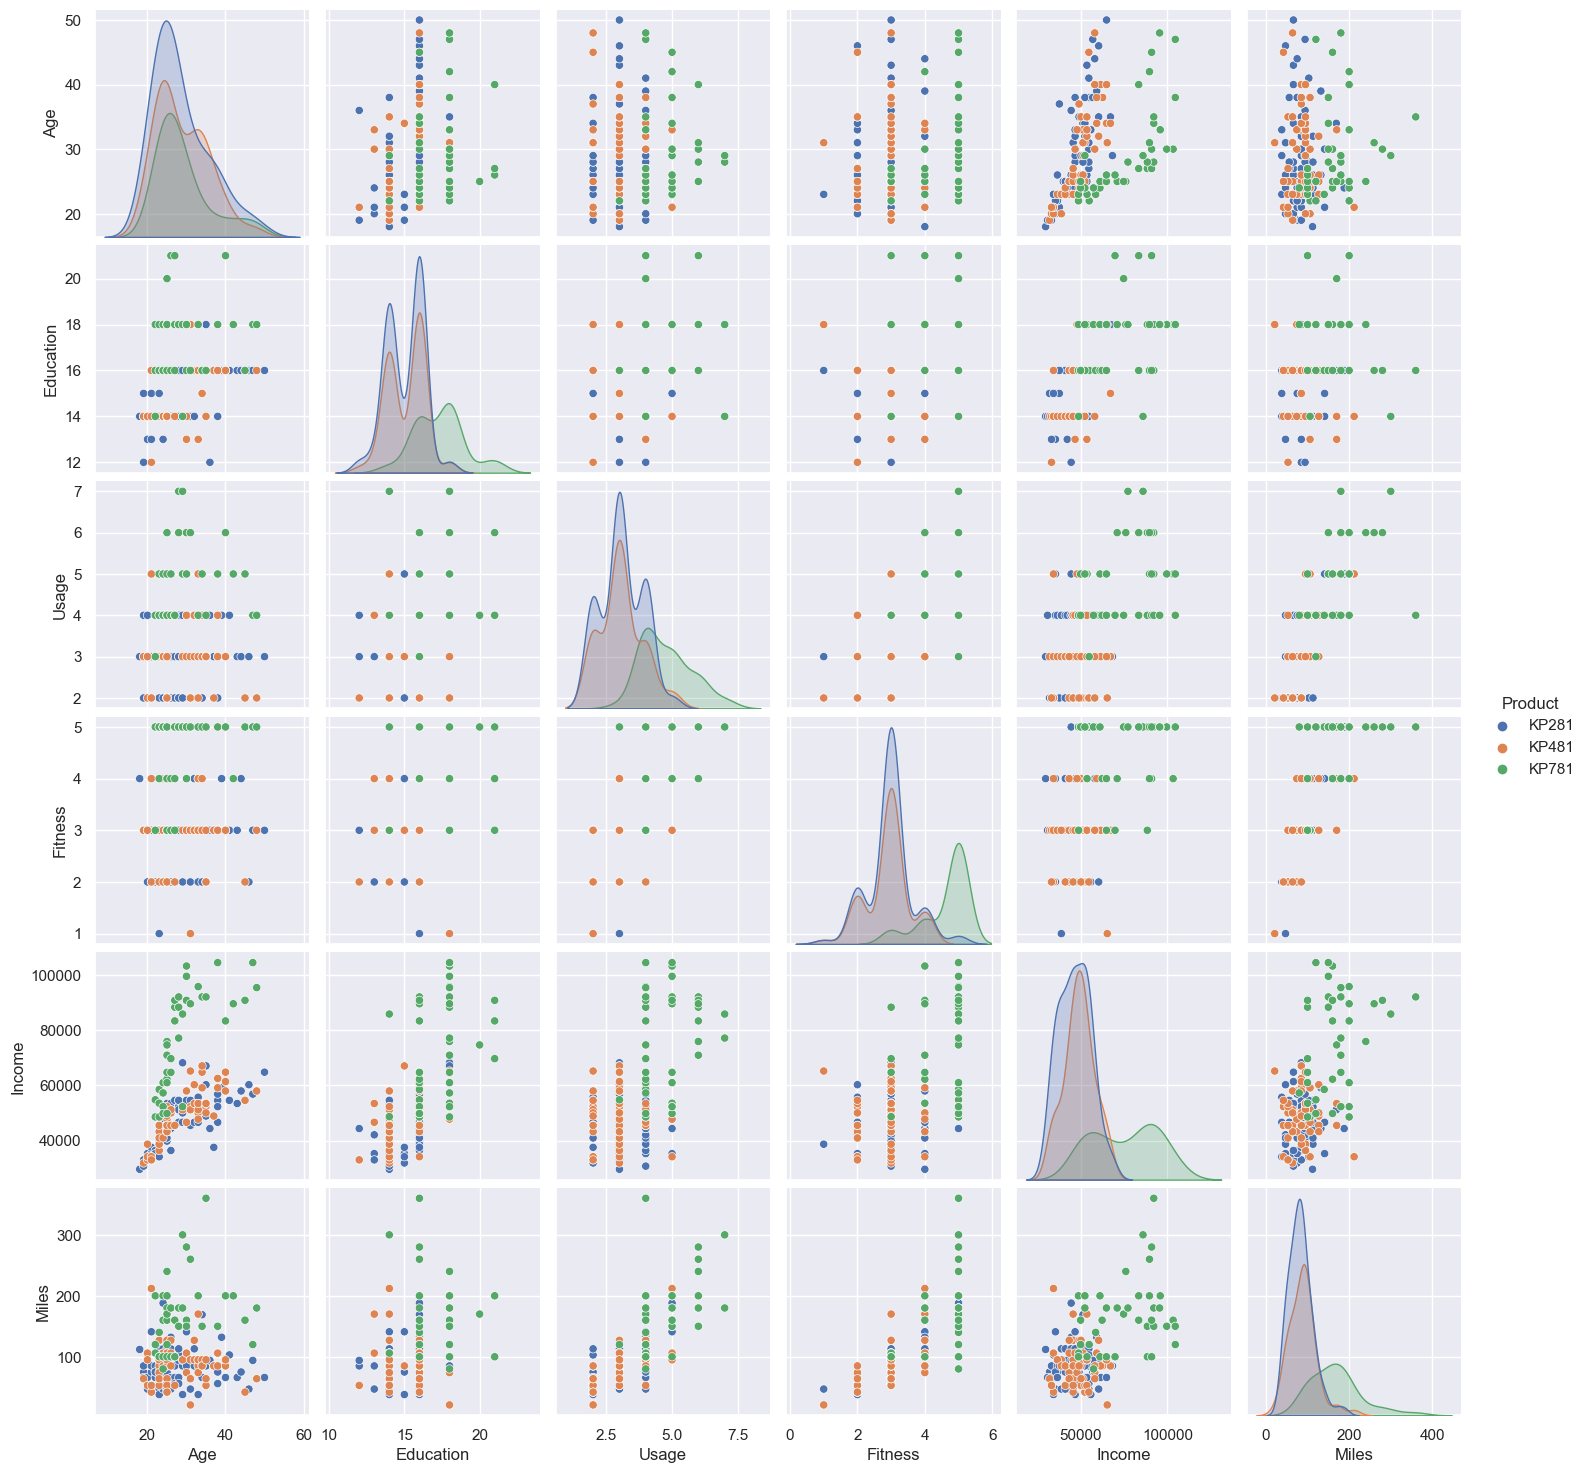

In [37]:
sns.pairplot(aerofit_df, hue = "Product")
plt.show()

### Marginal & Conditional Probabilities
#### What percent of customers have purchased KP281, KP481, or KP781?

In [38]:
aerofit_df1 = aerofit_df[['Product', 'Gender', 'MaritalStatus']].melt()
(aerofit_df1.groupby(['variable', 'value'])[['value']].count() / len(aerofit_df)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

### Observations:

#### Product:
- **44.44%** of customers have purchased the **KP281** product.
- **33.33%** of customers have purchased the **KP481** product.
- **22.22%** of customers have purchased the **KP781** product.

#### Gender:
- **57.78%** of the customers are **Male**.

#### Marital Status:
- **59.44%** of the customers are **Partnered**.

### Probability Analysis:
What is the likelihood of a customer purchasing a specific treadmill product based on their **Gender** (Male or Female)?

In [39]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    aerofit_df1 = pd.crosstab(index=aerofit_df['Gender'], columns=[aerofit_df['Product']])
    p_281 = aerofit_df1['KP281'][gender] / aerofit_df1.loc[gender].sum()
    p_481 = aerofit_df1['KP481'][gender] / aerofit_df1.loc[gender].sum()
    p_781 = aerofit_df1['KP781'][gender] / aerofit_df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {aerofit_df1.loc['Male'].sum()/len(aerofit_df):.2f}")
        print(f"P(Female): {aerofit_df1.loc['Female'].sum()/len(aerofit_df):.2f}\n")
    
    print(f"P(KP281/{gender}): {p_281:.2f}") 
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP781/{gender}): {p_781:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



#### What is the probability of a customer based on MaritalStatus ( Single or Partnered ) buying a certain treadmill Product?

In [40]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    aerofit_df1 = pd.crosstab(index=aerofit_df['MaritalStatus'], columns=[aerofit_df['Product']])
    p_281 = aerofit_df1['KP281'][status] / aerofit_df1.loc[status].sum()
    p_481 = aerofit_df1['KP481'][status] / aerofit_df1.loc[status].sum()
    p_781 = aerofit_df1['KP781'][status] / aerofit_df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {aerofit_df1.loc['Single'].sum()/len(aerofit_df):.2f}")
        print(f"P(Partnered): {aerofit_df1.loc['Partnered'].sum()/len(aerofit_df):.2f}\n")
    
    print(f"P(KP281/{status}): {p_281:.2f}") 
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



In [41]:
product_gender = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Gender']],margins=True)
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [42]:
# Percentage of a Male customer purchasing a treadmill
prob = round((product_gender['Male']['All'] / product_gender['All']['All']),2)
pct = round(prob*100,2)
pct

58.0

In [43]:
# Percentage of a Female customer purchasing KP781 treadmill
prob = round((product_gender['Female']['KP781'] / product_gender['All']['All']),2)
pct = round(prob*100,2)
pct

4.0

In [44]:
# Probability of a customer being a Female given that Product is KP281
#P(A|B) = P(A,B)/P(B) - Bayes' Theorem
#P(Female|KP281) = P(Female,KP281)/P(KP281)

prob = round((product_gender['Female']['KP281'] / product_gender['All']['KP281']),2)
pct = round(prob*100,2)
pct

50.0

### Observations:

#### Product:
- Female customer prefer to buy KP281 & KP481.
- 50% of female tend to purchase treadmill model KP281

In [51]:
aerofit_df2 = aerofit_df.copy()

bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
aerofit_df2['AgeGroup'] = pd.cut(aerofit_df2['Age'], bins)
aerofit_df2['AgeCategory'] = pd.cut(aerofit_df2['Age'], bins,labels=labels)

In [52]:
product_age = pd.crosstab(index=aerofit_df2['Product'], columns=[aerofit_df2['AgeCategory']],margins=True)
product_age

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [53]:
# Percentage of customers with Age between 20s and 30s among all customers
prob = round((product_age['20s']['All'] / product_age['All']['All']),2)
pct = round(prob*100,2)
pct

61.0

### Observations:

- Teens don't prefer to buy KP781
- 61% of customers are wbetween 20 and 30 years old

In [56]:
aerofit_df3 = aerofit_df.copy()

bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
aerofit_df3['IncomeCategory'] = pd.cut(aerofit_df3['Income'],bins_income,labels = labels_income)

In [57]:
product_income = pd.crosstab(index=aerofit_df3['Product'], columns=[aerofit_df3['IncomeCategory']],margins=True)
product_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [58]:
prob = round(product_income['Low Income']['All'] / product_income['All']['All'],2)
pct = round(prob*100,2)
pct

8.0

In [59]:
prob = round(product_income['High Income']['KP781']/ product_income['All']['All'],2)
pct = round(prob*100,2)
pct

9.0

In [60]:
prob = round(product_income['High Income']['KP781'] / product_income['All']['KP781'],2)
pct = round(prob*100,2)
pct

42.0

In [61]:
product_fitness = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Fitness']],margins=True)
product_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [62]:
# Percentage of a customers having fitness level 5 
prob = round((product_fitness[5]['All'] / product_fitness['All']['All']),2)
pct = round(prob*100,2)
pct

17.0

In [63]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill
prob = round((product_fitness[5]['KP781']/ product_fitness['All']['All']),2)
pct = round(prob*100,2)
pct

16.0

In [64]:
# Percentage of customer with fitness level 5 buying KP781 treadmill given that Product is KP781
prob = round((product_fitness[5]['KP781']/ product_fitness['All']['KP781']),2)
pct = round(prob*100,2)
pct # customers with fitness level 5 make up 72% of KP781 buyers

72.0

In [65]:
product_marital = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['MaritalStatus']],margins=True)
product_marital

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [67]:
# Percentage of a customers who are partnered using treadmills 
prob = round((product_marital['Partnered']['All'] / product_marital['All']['All']),2)
pct = round(prob*100,2)
pct 

59.0

### Outlier Detection

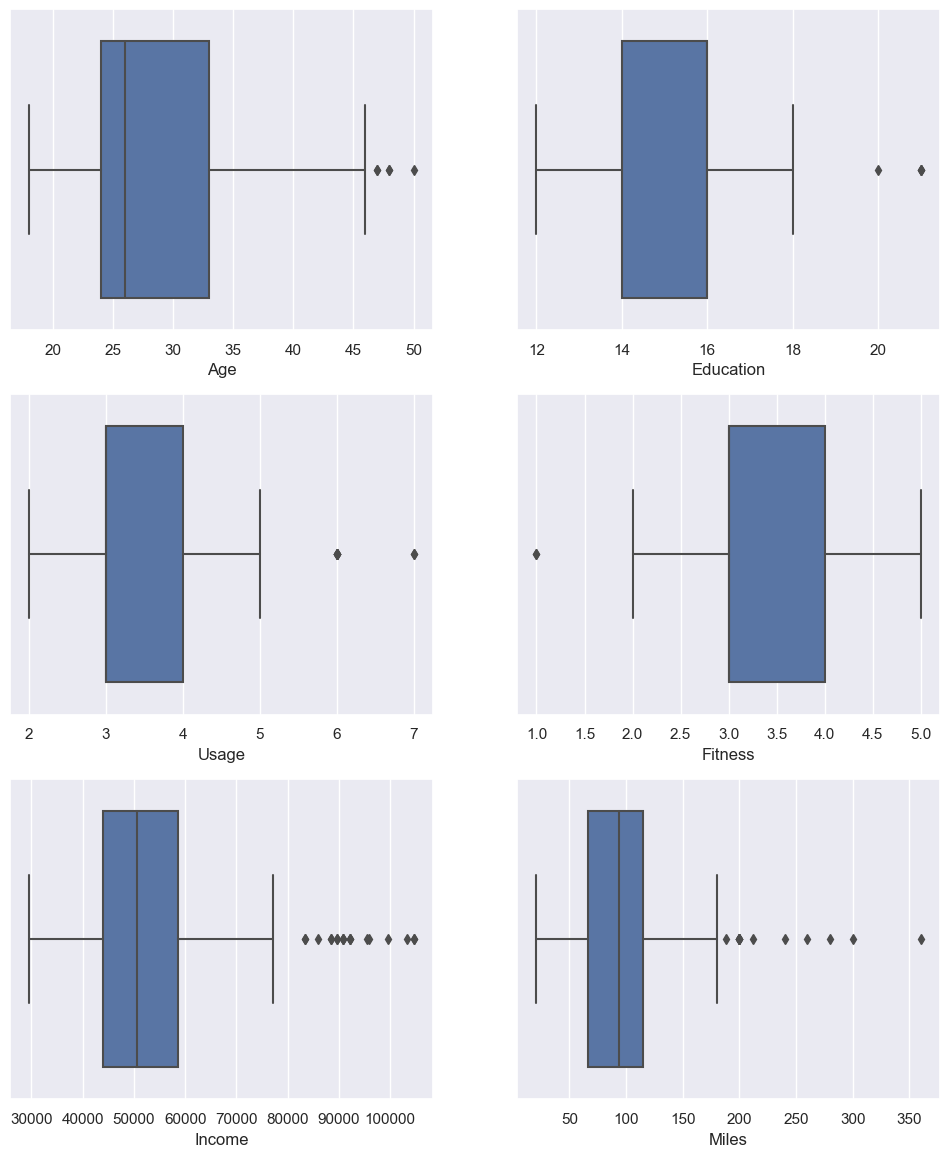

In [68]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit_df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=aerofit_df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

### Observations:

- Age, Education and Usage are having very few outliers.
- Income and Miles are having more outliers.
- Only a few of our customers run more than 180 miles per week

### Outlier Handling for Income Feature

In [69]:
aerofit_df1 = aerofit_df.copy()

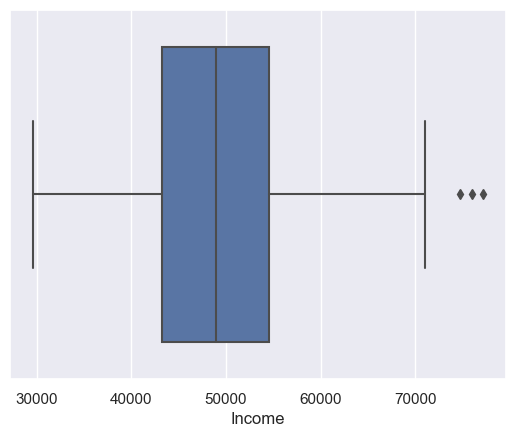

In [70]:
Q3 = aerofit_df1['Income'].quantile(0.75)
Q1 = aerofit_df1['Income'].quantile(0.25)
IQR = Q3-Q1
aerofit_df1 = aerofit_df1[(aerofit_df1['Income'] > Q1 - 1.5*IQR) & (aerofit_df1['Income'] < Q3 + 1.5*IQR)]

sns.boxplot(data=aerofit_df1, x="Income", orient='h')
plt.show()

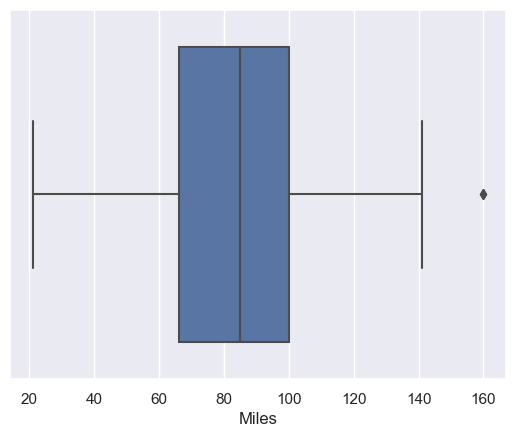

In [71]:
Q3 = aerofit_df1['Miles'].quantile(0.75)
Q1 = aerofit_df1['Miles'].quantile(0.25)
IQR = Q3-Q1
aerofit_df1 = aerofit_df1[(aerofit_df1['Miles'] > Q1 - 1.5*IQR) & (aerofit_df1['Miles'] < Q3 + 1.5*IQR)]

sns.boxplot(data=aerofit_df1, x="Miles", orient='h')
plt.show()

In [72]:
# Before removal of Outliers
aerofit_df.shape

(180, 9)

In [73]:
# After removal of Outliers
aerofit_df1.shape

(147, 9)

### Actionable Insights & Recommendations

#### Actionable Insights:

- **Model KP281** is the most popular product, accounting for **44.0%** of all treadmill sales.
- The majority of treadmill buyers fall within the **$45,000 - $80,000** income bracket.
- **83%** of treadmill purchases are made by individuals with incomes between **$35,000 and $85,000**.
- Only **8%** of customers with incomes below **$35,000** purchase treadmills.
- **88%** of treadmills are bought by customers aged **20 to 40**.
- A strong correlation exists between **Miles & Fitness** and **Miles & Usage**, indicating that customers with higher fitness levels tend to use treadmills more frequently.

- The **KP781** is exclusively purchased by customers with over **20 years of education** and an income exceeding **$85,000**.
- Customers with a fitness level of **4 or 5** tend to prefer high-end treadmills like the KP781, with an average weekly mileage of over **150 miles**.

#### Recommendations:

1. **KP281** and **KP481** are popular among customers with incomes between **$45,000 and $60,000**, making them ideal for marketing as affordable models. Companies should focus on positioning these treadmills as value-for-money options for this income segment.

2. **KP781** should be marketed as a **premium model**, targeting high-income groups and customers with over **20 years of education**. Promoting this model to affluent, well-educated individuals could increase sales.

3. Given the premium nature of the **KP781**, it is best suited for **athletic or fitness-conscious** individuals who have a high weekly mileage and can afford a high-end treadmill. Marketing efforts should emphasize its advanced features and suitability for serious fitness enthusiasts.

4. **Aerofit** should consider conducting market research to explore strategies for attracting customers with incomes below **$35,000**, potentially expanding its customer base by offering more accessible options or financing plans.

